# Projet de programmation

## Introduction <a name="intro"></a>

Il faut récupèrer le projet avec : 

    git clone https://github.com/gwatkinson/projet-python-twitter.git

Puis, il faut créer le fichier `projet/_credentials.py`, qui contient les clés de l'API de Twitter.

Dans le format suivant :

```python
credentials = {
    "consumer_key": "XXXXXXX",
    "consumer_secret": "XXXXXXX",
    "access_token": "XXXXXXX",
    "access_token_secret": "XXXXXXX",
}
```

Finalement, il suffit d'executer les cellules de ce notebook dans l'ordre.

## Table des matières

* [Introduction](#intro)
* [1)Récupération des données](#data)
* [2)Modélisation](#model)
    * [a.Prepocessing](#process)
    * [b.Clustering](#cluster)
* [3)Visualisation](#visu)
    * [a.Nuages de mots](#cloud)
    * [b.Carte interactive](#map)
* [Conclusion](#conc)
* [Annexes](#annex)

## 1) Récupération des données <a name="data"></a>



Nous avons utilisé l'**API** de Twitter pour récupérer les nouveaux tweets publiés sur Twitter, la nuit du 3 au 4 Novembre 2020 (la nuit de l'éléction américaine). Nous avons seulement récupérer les tweets qui contennaient certains mots :

In [1]:
# Liste 3 sur Trump et Biden uniquement
liste_3 = [
    "biden",
    "trump",
    "JoeBiden",
    "realDonaldTrump",
]

# Liste 4 sur le thème 'vote'
liste_4 = [
    "iwillvote",
    "govote",
    "uselection",
    "vote",
]

# Liste 5 sur le thème 'election'
liste_5 = [
    "uselection",
    "president",
    "presidentialelection",
    "presidential",
    "electionnight",
]

Pour cela, nous avons utilisé le module python `tweepy` ainsi que les fonctions codées dans le module `streaming` (voir la documentation pour plus d'information sur [`start_stream`](https://gwatkinson.github.io/projet-python-twitter/streaming.html#projet_python_twitter.streaming.start_stream)). Voici un exemple d'utilisation du code que nous avons écrit :

In [2]:
import projet.streaming as stream                           # Contient les fonctions pour le streaming
import projet.listes_mots as listes                         # Contient les listes de mots
import projet._credentials as cred                          # Contient les clés d'authentification à l'API

credentials = stream.CredentialsClass(cred.credentials)     # Pour se connecter à l'API (il faut le fichier projet/_credentials.py)

stream.start_stream(
    credentials=credentials,
    liste_mots=listes.liste_3,                              # Liste des mots à tracker (voir `projet.listes_mots`)
    nb=200,                                                 # Nombre de tweets à recupérer
    # timeout=10/3600,                                        # Durée du stream
    fprefix="exemple_liste_3",                              # À modifier en fonction de la liste selectionnée
    path="./data/json/",                                    # À modifier selon l'utilisateur (doit finir par "/" ou "\")
    verbose=True,
)

Début du stream
Progress: [------------------->] 100 %
Les 200 tweets ont été récupérés.
Le stream a duré : 0.0h
Fin du stream


Un fichier `json` a été créé dans `data/json/`.

Pour voir à quoi ressemble les données :

In [1]:
import glob
import json
import pandas as pd

path = glob.glob("data/json/exemple_liste_3*.json")[-1]  # On récupère le dernier fichier exemple crée
print("On regarde le fichier : "+path+"\n")

tweets_list = []
with open(path, "r") as fh:
    file = fh.read().split("\n")
    for line in file:
        if line:
            tweets_list.append(json.loads(line))

print("Le premier tweet :")
print(tweets_list[0])


On regarde le fichier : data/json\exemple_liste_3_20201210-214957.json

Le premier tweet :
{'created_at': 'Thu Dec 10 20:49:52 +0000 2020', 'id': 1337137480613711876, 'id_str': '1337137480613711876', 'text': "RT @bradheath: Pennsylvania also notes that Texas' ridiculous statistical analysis of how improbable it would be for Biden to have won the…", 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 275619035, 'id_str': '275619035', 'name': 'Sam Burling', 'screen_name': 'wolfpac_five', 'location': 'Rhode Island', 'url': None, 'description': 'soccer fan, veteran, runner, views expressed are my own. Proud father to an Angel Baby and a Rainbow Daughter.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 322, 'friends_c

Il s'agit du format `json`. Il est difficile de voir les variable comme cela. On peut créer une `dataframe pandas` pour mieux comprendre les données.

In [2]:
df_tweets = pd.DataFrame(tweets_list)
df_tweets.head()

,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,lang,timestamp_ms,display_text_range,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet
0,Thu Dec 10 20:49:52 +0000 2020,1337137480613711876,1337137480613711876,RT @bradheath: Pennsylvania also notes that Te...,"<a href=""http://twitter.com/#!/download/ipad"" ...",False,NaN,None,NaN,None,...,en,1607633392848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Dec 10 20:49:52 +0000 2020,1337137480290676737,1337137480290676737,@realDonaldTrump https://t.co/i4oh7r8VGa,"<a href=""http://twitter.com/download/iphone"" r...",False,1.337131e+18,1337131119632916481,25073877.0,25073877,...,und,1607633392771,"[16, 16]","{'media': [{'id': 1337137475563753472, 'id_str...",False,NaN,NaN,NaN,NaN,NaN
2,Thu Dec 10 20:49:52 +0000 2020,1337137480609509395,1337137480609509395,Treason,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,None,NaN,None,...,en,1607633392847,NaN,NaN,NaN,1.337136e+18,1337135543373733889,{'created_at': 'Thu Dec 10 20:42:10 +0000 2020...,"{'url': 'https://t.co/UaQQUAtixW', 'expanded':...",NaN
3,Thu Dec 10 20:49:52 +0000 2020,1337137480592711684,1337137480592711684,"RT @gatewaypundit: President Trump Tweets - ""P...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,en,1607633392843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Thu Dec 10 20:49:52 +0000 2020,1337137480642990081,1337137480642990081,RT @RealMattCouch: Any AG in a state that Pres...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,None,NaN,None,...,en,1607633392855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Dimensions : ", df_tweets.shape)

Dimensions :  (200, 36)


In [4]:
print("Colonnes :\n")
for name in list(df_tweets):
    print(name)

Colonnes :

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms
display_text_range
extended_entities
possibly_sensitive
quoted_status_id
quoted_status_id_str
quoted_status
quoted_status_permalink
extended_tweet


## 2) Modélisation <a name="model"></a>

### a. Preprocessing <a name="process"></a>

Nous avons fait une fonction qui fait les étapes précédentes ainsi que des fonctions pour nettoyer les données. Elles sont dans le fichier `processing.py`.

In [1]:
import projet.processing as process                         # Contient les fonctions pour le processing de la dataframe

folder = "./data/json/"                                     # Pour écupèrer tous les fichiers json dans le dossier 'data/json/'

dirty_df = process.tweet_json_to_df(folder=folder, verbose=True)     # Convertit les json en dataframe pandas


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
La conversion des fichiers 'json' a commencé, cela peut prendre du temps
File 1/9: [------------------>] 100 %
File 2/9: [------------------>] 100 %
File 3/9: [------------------>] 100 %
File 4/9: [------------------>] 100 %
File 5/9: [------------------>] 100 %
File 6/9: [------------------>] 100 %
File 7/9: [------------------>] 100 %
File 8/9: [------------------>] 100 %
File 9/9: [------------------>] 100 %


Nous avons ainsi récupérer les fichiers dans `data/json/` dans la dataframe pandas `dirty_df`.

Elle ressemble à :

In [ ]:

dirty_df.head()

On peut ensuite utiliser `clean_df` pour filtrer et nettoyer la base de donnée en conservant seulement les informations qui nous interressent. On peut aussi utiliser une liste de `listes_variables` pour récupérer d'autres variables ou en ajouter dans l'option `extra` de `clean_df`. Voir la doc pour plus de détails : [`clean_df`](https://gwatkinson.github.io/projet-python-twitter/projet/processing.html#projet.processing.clean_df).

In [2]:
clean_df = process.clean_df(dirty_df, index="id", date="created_at", verbose=True)

Le nettoyage a commencé
Progress: [------------------->] 100 %


In [6]:
text_df = process.get_full_text(clean_df, new_var="full_text", drop_vars=True)

In [5]:
from importlib import reload
reload(process)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<module 'projet.processing' from 'c:\\Users\\gabri\\OneDrive\\Desktop\\projet-python-twitter\\projet\\processing.py'>

In [20]:
politic_df = process.add_politics(text_df)

In [10]:
politic_df[["full_text", "full_text-contains_trump", "full_text-contains_biden"]].head()

,full_text,contains_trump,contains_biden
id,,,
1336989688167587848,I’m telling President @realDonaldTrump to stri...,True,False
1336989688154869760,The fact that most GOP leaders don't condemn a...,False,False
1336989688565964801,I love democracy.\n\nSo fuck Trump. And fuck m...,True,False
1336989688612220928,@Thinkingifree17 @llgraves @AngelaBelcamino @r...,True,False
1336989688612212736,So evil! And he admitted the purpose of releas...,True,False


In [11]:
from importlib import reload
reload(process)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<module 'projet.processing' from 'c:\\Users\\gabri\\OneDrive\\Desktop\\projet-python-twitter\\projet\\processing.py'>

In [12]:
sentiment_df = process.add_sentiment(politic_df)

<AxesSubplot:ylabel='Frequency'>

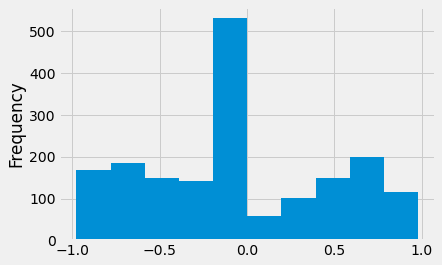

In [49]:
sentiment_df["full_textAjout-sentiment-compound"].plot.hist()

In [7]:
final_df = process.sentiment_class(sentiment_df)

NameError: name 'sentiment_df' is not defined

In [15]:
sum(final_df["user-description-contains_trump"].isnull())/len(final_df)

0.23055555555555557

In [16]:
sum(~final_df["user-location"].isnull())/len(final_df)

0.5644444444444444

In [17]:
import projet.modelisation as model

In [22]:
std_mat = model.standardize(final_df, model.get_numeric(final_df.drop("user-id", axis=1)))

In [23]:
std_mat

,user-followers_count,user-friends_count,user-listed_count,user-favourites_count,user-statuses_count,contains_trump,contains_biden,full_text-sentiment-compound,user-description-sentiment-compound
0,-0.062594,0.134104,-0.052417,0.277071,-0.238486,0.785653,-0.710645,1.508730,-0.377211
1,-0.098261,-0.169629,-0.032526,0.444950,-0.095677,-1.272827,-0.710645,1.681368,1.762089
2,-0.100916,-0.157315,-0.082252,-0.540366,-0.505254,0.785653,-0.710645,-0.284206,-0.377211
3,-0.041334,0.048936,-0.027554,0.235356,-0.159587,0.785653,-0.710645,0.578789,-0.377211
4,-0.096287,-0.169950,-0.082252,1.047079,0.514843,0.785653,-0.710645,-1.742418,0.636566
...,...,...,...,...,...,...,...,...,...
1795,-0.089050,-0.046494,-0.067334,-0.364134,-0.263229,-1.272827,-0.710645,0.050327,-1.123860
1796,-0.058124,0.038610,-0.059875,0.222956,-0.381635,-1.272827,1.407172,0.618112,1.100700
1797,-0.094450,-0.165204,-0.069821,0.376882,-0.214248,-1.272827,-0.710645,0.895100,-0.377211
1798,-0.048958,-0.073879,0.136542,7.063491,2.583397,0.785653,-0.710645,-0.337724,-1.855122


In [40]:
from importlib import reload
reload(model)

<module 'projet.modelisation' from 'c:\\Users\\gabri\\OneDrive\\Desktop\\projet-python-twitter\\projet\\modelisation.py'>

In [44]:
kmeans, sse = model.add_group(std_mat, max_cluster=30)

8


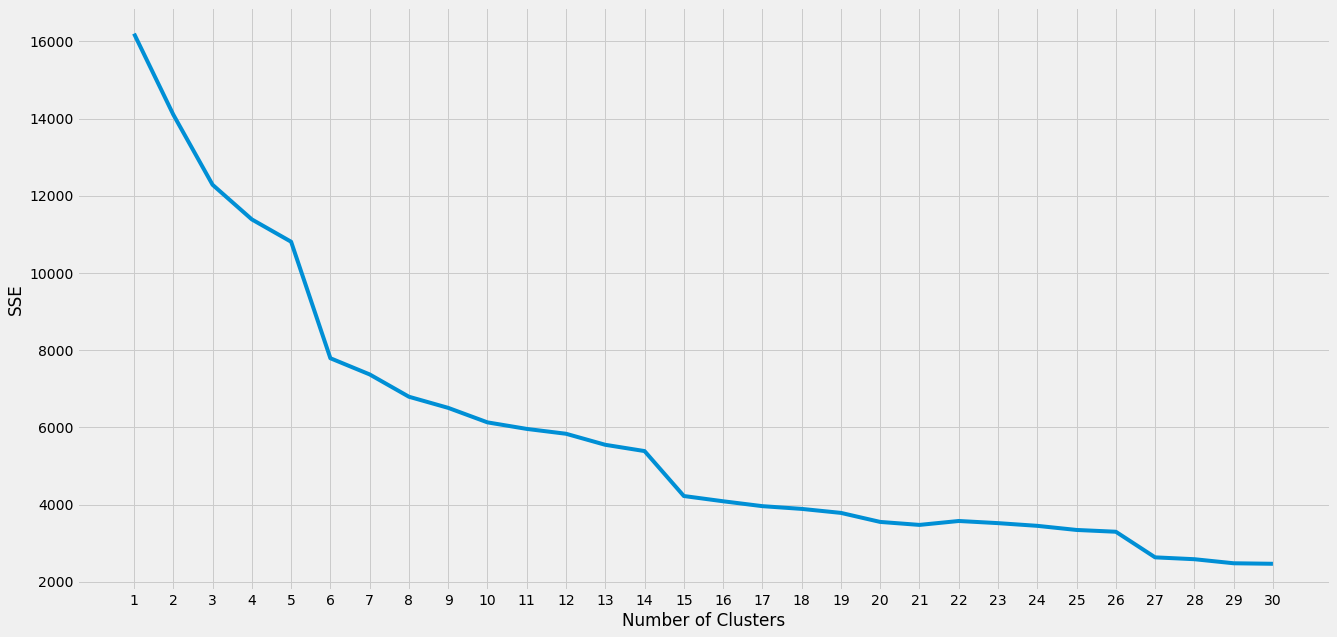

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 31), sse)
plt.xticks(range(1, 31))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [39]:
kmeans.cluster_centers_

array([[ 1.78329743e-01,  2.79143141e-01,  1.89011659e-01,
         2.47850571e+00,  2.52708741e+00, -3.77387915e-02,
         2.61981816e-01,  4.54722228e-03, -4.07988754e-02],
       [-5.27230229e-02, -4.44787588e-02, -2.53754558e-02,
        -9.52993218e-02, -1.36753927e-01, -1.27282651e+00,
         1.40717179e+00, -1.23490518e-02,  6.14725774e-02],
       [-7.03141761e-02, -8.11543390e-02, -5.97377197e-02,
        -2.97571021e-01, -2.59675194e-01,  7.85653024e-01,
        -3.31604161e-01, -4.68979604e-02, -6.01078492e-01],
       [-2.77000109e-02, -3.62836574e-02, -3.29100831e-02,
        -1.59935964e-01, -1.69927082e-01, -1.27282651e+00,
        -7.10645286e-01,  1.40399743e-01,  1.78488294e-02],
       [ 2.24423437e+01,  1.57011987e+01,  1.73781532e+01,
         1.10251310e+00,  4.60914338e-01,  9.94931777e-02,
        -7.10645286e-01,  3.75387477e-02, -5.12079026e-01],
       [-4.81931725e-02, -5.76777226e-03, -5.34080428e-02,
        -1.52653980e-01, -1.95844711e-01,  7.856530

### b. Clustering <a name="cluster"></a>

## 3) Visualisation <a name="visu"></a>

### a. Nuages de mots <a name="cloud"></a>

### b. Carte interactive <a name="map"></a>

## Conclusion <a name="conc"></a>

## Annexes <a name="annex"></a>